# Codificació - Modulació

In [2]:
import numpy as np
import random
import string

In [39]:
# List with the letters of the aplhabet
llista_a = ['a','b','c','d','e','f','g','h','i','j','k','l','m',
            'n','o','p','q','r','s','t','u','v','w','x','y','z']

# Codification matrix
Menc = np.array([[6, 24, 1],
                 [13, 16, 10],
                 [20, 17, 15]])

# Decodification matrix
Mdes = np.array([[8, 5, 10],
                 [21, 8, 21],
                 [21, 12, 8]])

# Generate a random string of fixed length, alpha false to include numbers and punctuation marks.
def randomString(stringLength=10,alpha=True):
    letters = string.ascii_lowercase 
    if(not alpha):
        letters += '.,!?¡¿";:^*¬&%$·|\/\\()=[]{}-_' + string.digits + string.ascii_uppercase
    return ''.join(random.choice(letters) for i in range(stringLength))

# Transform string into a list of indexes
def transforma_text(string):
    text = list(string.lower()) # Transform string into a char list (lowercase)
    for c in text:
        if c in llista_a: # If the char pertains to the alphabet, swap it for its corresponding index
            text[text.index(c)] = llista_a.index(c)
    return text

# Encode the list using the matrix
def encripta(idx_list):
    code_list = []
    #counter = 0
    #guardar posicio caracters
    while not(len(idx_list)%3 == 0): # Add zeroes at the end as padding if needed
        idx_list.append(0)
    for i in np.arange(0, len(idx_list), 3): # We encode the numbers in vectors of 3
        # Filter NaNs
        vector = np.array([idx_list[i], idx_list[i+1], idx_list[i+2]])
        aux = (Menc.dot(vector))%26 # Encode vector and transform it to module 26
        #print(aux)
        code_list += aux.tolist() # Add encoded values to list
    return code_list

# Convert the values to binary(ASCII)
def binarize(code_list):
    binary_list = []
    for i in code_list: # Select each number individually
        aux = str(i).zfill(2) # If number < 10, we add a 0 to its left
        for j in aux:
            binary_list += bin(ord(j))[2:].zfill(8) # Transform each digit to binary(ASCII), and add it to the list
    return binary_list

# Transform binary list back to encoded list of indexes
def unbinarize(binary_list):
    code_list = []
    for i in np.arange(0, len(binary_list), 16): # Select all bits from list in groups of 16
        aux = ''
        for j in range(2): # For each group of 8 bits
            bit = ''.join(str(e) for e in binary_list[i+8*j:i+8*(j+1)]) # Transform back to digit
            aux += chr(int(bit, 2)) # Write down digit
        code_list.append(int(aux)) # Add number to list
    return code_list

# General decode method, transforms binary list back to text
def desencripta(binary_list):
    code_list = unbinarize(binary_list) # Transform binary list to indexes
    idx_list = []
    for i in np.arange(0, len(code_list), 3): # Decode all indexes of list in vectors of 3
        vector = np.array([code_list[i], code_list[i+1], code_list[i+2]]) # If missing, add zeros!!!
        aux = (Mdes.dot(vector))%26 # Decode vector and transform it to module 26
        idx_list += aux.tolist() # Add decoded values to list
    #print(idx_list)
    # Transform list of indexes back to text
    text = ''
    for i in idx_list:
        text += (llista_a[i])
    return text

In [40]:
### CODIFICATION METHODS ###

# NRZ
def encode_NRZ(binary_list):
    return [1 if x != '0' else -1 for x in binary_list]

def decode_NRZ(binary_list):
    return ['1' if x != -1 else '0' for x in binary_list]
    
# NRZ-L
def encode_NRZL(binary_list):
    return [-1 if x != '0' else 1 for x in binary_list]

def decode_NRZL(binary_list):
    return ['0' if x != -1 else '1' for x in binary_list]

# NRZI
def encode_NRZI(binary_list):
    phase = -1
    encoded_list = []
    for i in range(len(binary_list)):
        if binary_list[i] == '1':
            phase *= -1
        encoded_list.append(phase)
    return encoded_list

def decode_NRZI(binary_list):
    binlist = []
    phase = -1
    prev = binary_list[0]
    mode = False
    for i in range(len(binary_list)):
        if (binary_list[i] != prev) and not(mode):
            phase *= -1
            mode = True
        if (binary_list[i] == prev) and mode:
            phase *= -1
            mode = False
        prev = binary_list[i]
        if phase == -1:
            binlist.append('0')
        else:
            binlist.append('1')
    code_list = unbinarize(binlist)
    return desencripta(code_list)

# Bipolar-AMI
def encode_AMI(binary_list):
    phase = -1
    encoded_list = []
    for i in range(len(binary_list)):
        if binary_list[i] == '1':
            phase *= -1
            encoded_list.append(phase)
        else:
            encoded_list.append(0)
    return encoded_list

def decode_AMI(binary_list):
    return ['0' if x == 0 else '1' for x in binary_list]

# Pseudoternary
def encode_Pseudo(binary_list):
    phase = -1
    encoded_list = []
    for i in range(len(binary_list)):
        if binary_list[i] == '0':
            phase *= -1
            encoded_list.append(phase)
        else:
            encoded_list.append(0)
    return encoded_list

def decode_Pseudo(binary_list):
    return ['1' if x == 0 else '0' for x in binary_list]

# Manchester
def encode_Manchester(binary_list):
    encoded_list = []
    
    if binary_list[0] == '1':
        encoded_list.append(-1)
    else:
        encoded_list.append(1)
    
    for i in np.arange(2, 2*len(binary_list), 2):
        if binary_list[(i//2)-1] == '1':
            encoded_list.append(1)
        else:
            encoded_list.append(-1)
        if binary_list[i//2] == '1':
            encoded_list.append(-1)
        else:
            encoded_list.append(1)
    
    if binary_list[-1] == '1':
        encoded_list.append(1)
    else:
        encoded_list.append(-1)
    
    return encoded_list

def decode_Manchester(binary_list):
    decoded_list = binary_list[1::2]
    return ['1' if x == 1 else '0' for x in decoded_list]

# Manchester Differential
#def decode_ManDiff(binary_list):
# TODO

# B8ZS
def encode_B8ZS(binary_list):
    phase = -1
    count = 0
    encoded_list = []
    for i in range(len(binary_list)):
        if binary_list[i] == '1':
            phase *= -1
            encoded_list.append(phase)
            count = 0
        else:
            count += 1
            if count < 8:
                encoded_list.append(0)
            else: # If we have 8 zeroes in a row, modify
                encoded_list.append(phase)
                encoded_list[i-4] = phase
                encoded_list[i-3] = -1*phase
                encoded_list[i-1] = -1*phase
                count = 0
    return encoded_list

def decode_B8ZS(binary_list):
    phase = -1
    v = 0
    for i in binary_list:
        if (binary_list[i] != 0):
            if(binary_list[i] != phase):# Code violation
                v += 1
            else:
                phase = binary_list[i]
        if v >= 2: # If we detect 2 code violations, transform to zeroes
            binary_list[i-3] = 0
            binary_list[i-2] = 0
            binary_list[i] = 0
            binary_list[i+1] = 0
            v = 0
            
    return ['0' if x == 0 else '1' for x in binary_list]

In [42]:
#test = transforma_text("Ola k ase, etc.")
test = transforma_text("testabcok")
print(test)
result = encripta(test)
print(result)
binlist = binarize(result)
print(binlist)
NRZ_list = encode_NRZ(binlist)
print(NRZ_list)
decode_list = decode_NRZ(NRZ_list)
print(decode_list)
print(desencripta(decode_list))

[19, 4, 18, 19, 0, 1, 2, 14, 10]
[20, 23, 16, 11, 23, 5, 20, 12, 12]
['0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0']
[-1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1,

In [16]:
# TODO: 
# - Examples for different codification methods
# - Plots?
# - MODULATION/DEMODULATION!!!

In [34]:
test_bin = ['0', '1', '0', '0', '1', '1', '0', '0']

NRZL_list = encode_NRZL(test_bin.copy())
print(NRZL_list)

NRZI_list = encode_NRZI(test_bin.copy())
print(NRZI_list)
#print(decode_NRZI(NRZI_list))

AMI_list = encode_AMI(test_bin.copy())
print(AMI_list)
#print(decode_AMI(AMI_list))

Pseudo_list = encode_Pseudo(test_bin.copy())
print(Pseudo_list)

Manchester_list = encode_Manchester(test_bin.copy())
print(Manchester_list)
#print(decode_Manchester(Manchester_list))

[1, -1, 1, 1, -1, -1, 1, 1]
[-1, 1, 1, 1, -1, 1, 1, 1]
[0, 1, 0, 0, -1, 1, 0, 0]
[1, 0, -1, 1, 0, 0, -1, 1]
[1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1]


In [81]:
randomString(40)

'yosabigvogmvydsjuqmywonmbqwwikkxckzwpela'

# Modulació

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
amplitud = 1
freq =  1
sinusoidal = amplitud*np.cos(2*np.pi*freq*np.arange(1000)/100)
def sinusoidal(x,amplitud=1, freq=1,steps=100):
    return amplitud*np.cos(2*np.pi*freq*x/steps)

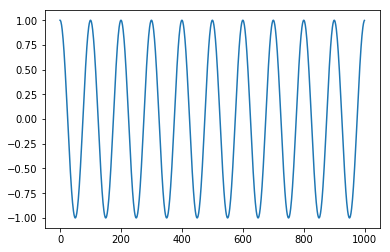

In [115]:
plt.plot(sinusoidal(np.arange(1000)))

In [146]:
def modulate(input_signal,step=500,freq=1):
    signal = np.array(input_signal)
    mod_signal = np.zeros(len(signal)*step)

    for i in range(len(signal)):
        mod_signal[i*step:(i+1)*step] = sinusoidal(np.arange(step),amplitud=signal[i],freq=freq)
    
    return mod_signal

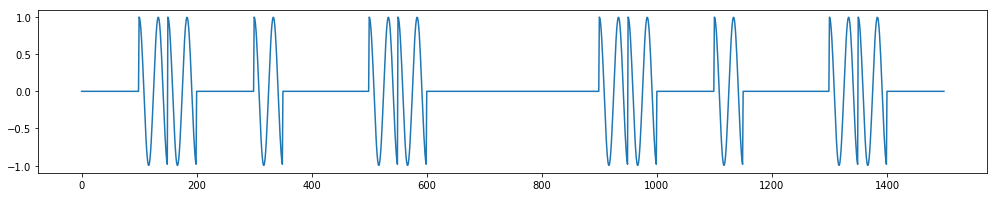

In [161]:
plt.figure(figsize=(17,3))
plt.plot(modulate(np.array(binlist).astype(int)[0:30],step=50,freq=3))
plt.show()

In [210]:
def demodulate(input_signal,step=500):
    size = len(input_signal)//step
    demod_signal = np.zeros(size)

    for i in range(size):
        demod_signal[i] = int(np.abs(input_signal[i*step:(i+1)*step]).sum() > .5)
    
    return demod_signal

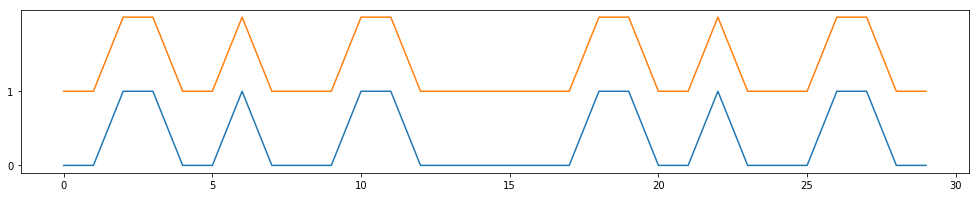

[ 0.  0.  0. ... -0. -0. -0.]


In [212]:
mod_sign = modulate(np.array(binlist).astype(int)[0:30],step=50,freq=3)

plt.figure(figsize=(17,3))
plt.plot(binlist[0:30])
plt.plot(demodulate(mod_sign,step=50)+1)
plt.show()

print(mod_sign)